In [ ]:
%run train.py

Starting training ref_network_test


[Validation]: 100%|██████████| 74/74 [00:22<00:00,  3.33it/s]


--- Validation results --- DICE: 0.078670, MSE: 0.240304, KL 0.003328


[Validation]: 100%|██████████| 74/74 [00:12<00:00,  5.73it/s]


--- Validation results --- DICE: 0.083282, MSE: 0.236527, KL 0.003961


Epoch 3/300 [Training]:  80%|████████  | 533/664 [02:35<00:38,  3.43it/s, loss=0.209] 

In [3]:
import sys
from tqdm import tqdm
from src.data_preparation import *
from src.network import *
from src.criterion import *
from src.testing_functions import *
from src.reference_net import *
from torch.optim.lr_scheduler import LambdaLR
from pathlib import Path
import pickle

#=========== SETUP PARAMETERS ===============

label = "test3"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#data_path = '../BRATS20/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'
data_path = '../BRATS20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
results_path = Path('training_results')/label
results_path.mkdir(parents=True, exist_ok=True)

checkpoint_path = results_path/"checkpoint.pth.tar"
checkpoint = torch.load(checkpoint_path)
with open(results_path/'params.pkl', 'rb') as f:
        params = pickle.load(f)

#=========== SETUP DATASETS AND DATA LOADERS ===============

test_dataset = BRATS_dataset(data_path, device, params)
test_loader = DataLoader(test_dataset, batch_size=params.batch_size, shuffle=True)

#=========== SETUP MODEL ===============

if params.net == "VAE":
    model = VAE_UNET(params.num_slices, input_dim=dataset.input_dim, HR_dim=dataset.output_dim)
elif params.net == "UNET":
    model = UNET(params.num_slices)
elif params.net == "ref":
    model = NvNet(inChans, input_shape, seg_outChans, activation, normalization, VAE_enable, mode='trilinear')
    

model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)

print("ready to test")


ready to test


Plotting results------------------------------------------------------------
torch.Size([1, 3, 16, 240, 240])


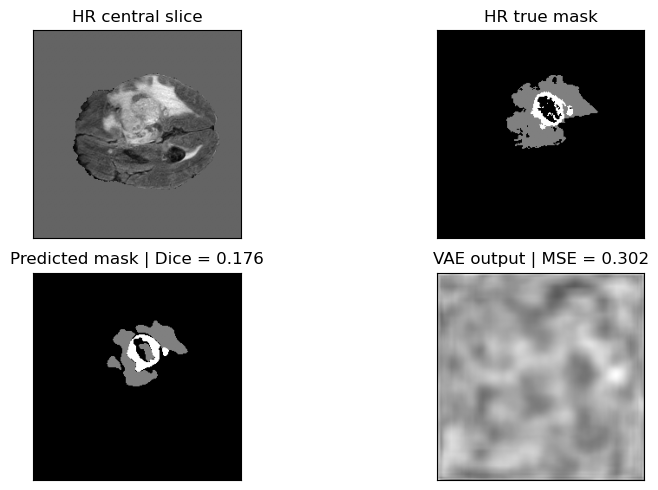

In [4]:

slices = [0]
plot_examples(model, test_dataset, slices, results_path, params.net)
